In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import scipy.stats as stats
from scipy.stats import linregress

In [76]:
# read cleaned us vax info
clean_vax_df= pd.read_csv ('../data/CLEAN_covid19_vaccinations_in_us.csv')
clean_vax_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Alaska,2176065,1328221,535718,73.2,418608,90909,81999,504958,452885,530318,474707
1,Alabama,12349530,7018011,3193141,65.1,2416344,840073,725159,3107922,2554026,3183544,2607644
2,Arkansas,8373210,4874091,2115165,70.1,1547724,524198,440981,2031772,1661645,2104099,1715538
3,Arizona,19959120,14647405,5704677,78.4,4239941,1348446,1188267,5394242,4596164,5663049,4805903
4,California,121107865,88487852,33613401,85.1,25681179,6058090,5441414,31630858,27956563,33267856,29371810


In [77]:
clean_vax_df = clean_vax_df.rename(columns={"Jurisdiction (State/Territory) or Federal Entity": "State"})
clean_vax_df.head()

,State,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Alaska,2176065,1328221,535718,73.2,418608,90909,81999,504958,452885,530318,474707
1,Alabama,12349530,7018011,3193141,65.1,2416344,840073,725159,3107922,2554026,3183544,2607644
2,Arkansas,8373210,4874091,2115165,70.1,1547724,524198,440981,2031772,1661645,2104099,1715538
3,Arizona,19959120,14647405,5704677,78.4,4239941,1348446,1188267,5394242,4596164,5663049,4805903
4,California,121107865,88487852,33613401,85.1,25681179,6058090,5441414,31630858,27956563,33267856,29371810


In [78]:
# read cleaned us pop
clean_st_pop_df= pd.read_csv ('../data/CLEAN_regionpopulation.csv')
clean_st_pop_df.head(50)

,State,2022 Population Estimate,Region
0,Connecticut,3626205,Northeast
1,Maine,1385340,Northeast
2,Massachusetts,6981974,Northeast
3,New Hampshire,1395231,Northeast
4,New Jersey,9261699,Northeast
5,New York,19677151,Northeast
6,Pennsylvania,12972008,Northeast
7,Rhode Island,1093734,Northeast
8,Vermont,647064,Northeast
9,Illinois,12582032,Midwest


In [89]:
# read cleaned covid deaths
clean_cov_death_df= pd.read_csv ('../data/CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
clean_cov_death_df.head(50)

,Data As Of,State,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,Alabama,01/01/2020,09/23/2023,All Sexes,All Ages,21520.0,231602.0,7411.0
1,09/27/2023,Alaska,01/01/2020,09/23/2023,All Sexes,All Ages,1492.0,20039.0,813.0
2,09/27/2023,Arizona,01/01/2020,09/23/2023,All Sexes,All Ages,30307.0,284393.0,17435.0
3,09/27/2023,Arkansas,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
4,09/27/2023,California,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0
5,09/27/2023,Colorado,01/01/2020,09/23/2023,All Sexes,All Ages,15378.0,176094.0,7850.0
6,09/27/2023,Connecticut,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
7,09/27/2023,Delaware,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
8,09/27/2023,Florida,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
9,09/27/2023,Georgia,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0


In [79]:
merge_vax_pop_df = pd.merge(clean_st_pop_df, clean_vax_df, on="State")
merge_vax_pop_df.head()

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,2816633,3640198,2948721
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,1252248,1070587,1303033,1116192
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,6947787,5480791,7306432,5770765
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,1152503,946332,1194903,977652
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,8011957,6701732,8374653,7008596


In [91]:

# merge with deaths csv
merge_all_df = pd.merge(merge_vax_pop_df, clean_cov_death_df, on = "State")
merge_all_df.head(50)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
5,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
6,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
7,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
8,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
9,Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0


In [80]:
merge_vax_pop_df["Region"].unique()

array(['Northeast', 'Midwest', 'South', 'West'], dtype=object)

Text(0.5, 1.0, 'Total doses distributed per Region')

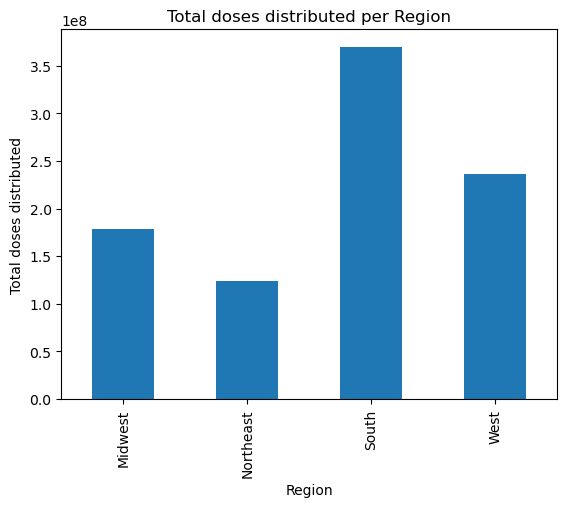

In [81]:
# total doses distributed per region 'Northeast', 'Midwest', 'South', 'West'
tot_dose = merge_vax_pop_df.groupby(['Region'])['Total doses distributed'].sum().reset_index()

#plot bar graph
tot_dose.plot(kind='bar', x='Region', y='Total doses distributed', legend=False)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total doses distributed')
plt.title('Total doses distributed per Region')



Text(0.5, 1.0, 'Total doses administered by jurisdiction per Region')

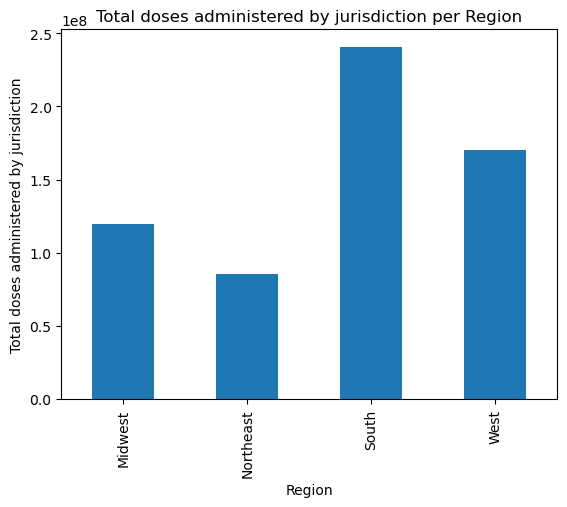

In [82]:
# total doses administered per region 'Northeast', 'Midwest', 'South', 'West'
tot_admin = merge_vax_pop_df.groupby(['Region'])['Total doses administered by jurisdiction'].sum().reset_index()

#plot bar graph
tot_admin.plot(kind='bar', x='Region', y='Total doses administered by jurisdiction', legend=False)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total doses administered by jurisdiction')
plt.title('Total doses administered by jurisdiction per Region')

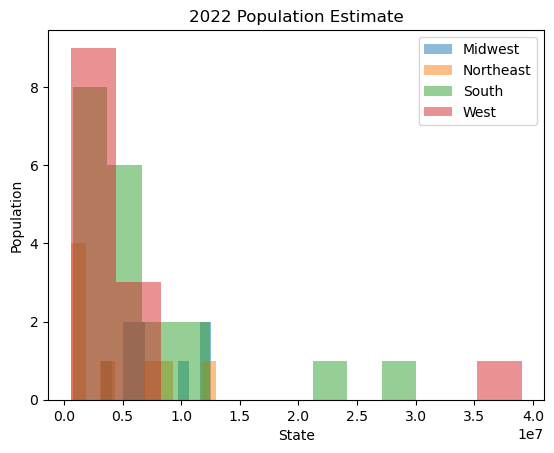

In [83]:
merge_vax_pop_df.groupby("Region")['2022 Population Estimate'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('2022 Population Estimate')
plt.xlabel('State')
plt.ylabel('Population')
plt.show()

The r-squared is: 0.9939030873060445


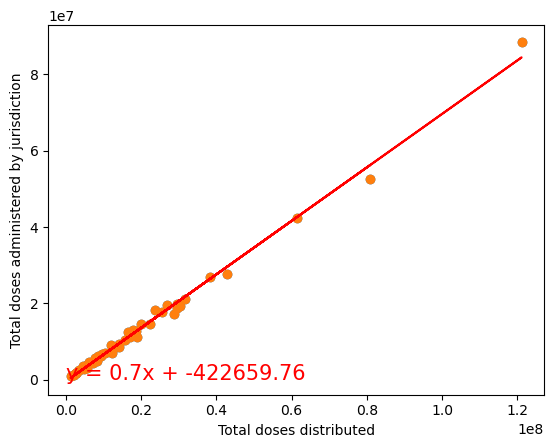

In [84]:
# Plot out Total doses distributed vs Total doses administered by jurisdiction
x_values = merge_vax_pop_df['Total doses distributed']
y_values = merge_vax_pop_df['Total doses administered by jurisdiction']
plt.scatter(x_values,y_values)
plt.xlabel('Total doses distributed')
plt.ylabel('Total doses administered by jurisdiction')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.9734991963363164


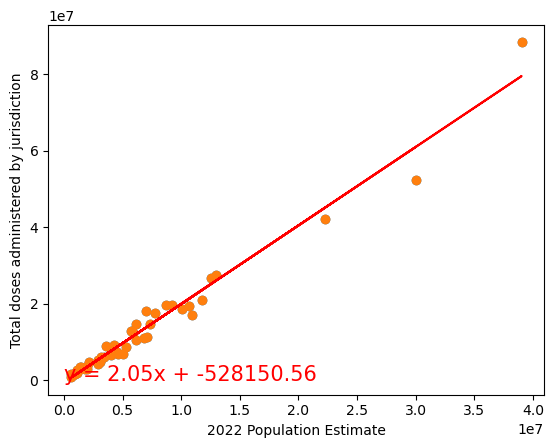

In [85]:
# linear regression pop vs tot dose admin
x_values = merge_vax_pop_df['2022 Population Estimate']
y_values = merge_vax_pop_df['Total doses administered by jurisdiction']
plt.scatter(x_values,y_values)
plt.xlabel('2022 Population Estimate')
plt.ylabel('Total doses administered by jurisdiction')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [86]:
def gendata(loc1=0, loc2=0):
    population1 = merge_vax_pop_df["2022 Population Estimate"]
    population2 = merge_vax_pop_df["Total doses administered by jurisdiction"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

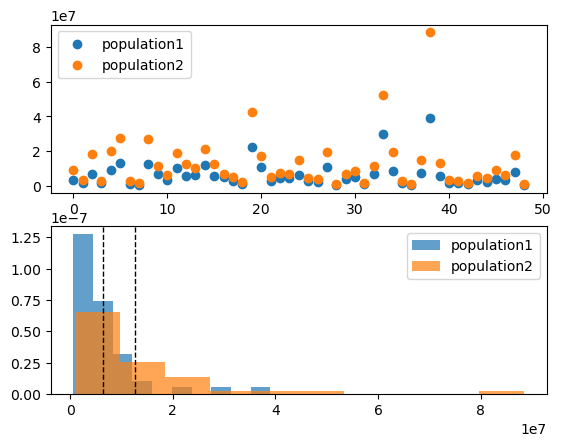

In [87]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [88]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=-2.577814493405914, pvalue=0.012079419044073305, df=69.06736448865128)